In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [44]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AE_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,NaN,0.00,0.00,0.00,0.00,NaN,0.00,...,NaN,NaN,0.348,NaN,NaN,NaN,NaN,NaN,15.0,NaN
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,NaN,0.00,0.68,0.0,0.34,0.34,0.00,0.00,NaN,0.00,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	522
float64		column 2	116
float64		column 3	116
float64		column 4	464
float64		column 5	290
float64		column 6	348
float64		column 7	522
float64		column 8	638
float64		column 9	994
float64		column 10	464
float64		column 11	754
float64		column 12	116
float64		column 13	348
float64		column 14	878
float64		column 15	994
float64		column 16	696
float64		column 17	870
float64		column 18	696
float64		column 19	232
float64		column 20	1284
float64		column 21	1102
float64		column 22	348
float64		column 23	1284
float64		column 24	820
float64		column 25	1168
float64		column 26	1400
float64		column 27	58
float64		column 28	1284
float64		column 29	1226
float64		column 30	1516
float64		column 31	1400
float64		column 32	1682
float64		column 33	116
float64		column 34	1864
float64		column 35	1806
float64		column 36	1806
float64		column 37	870
float64		column 38	522
float64		column 39	1052
float64		column 40	1748
float64		column 41	580
float64		colum

In [46]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4075.000000,4481.000000,4481.000000,4133.000000,4307.000000,4249.000000,4075.000000,3959.000000,3603.000000,4133.000000,...,4307.000000,3313.000000,3255.000000,3611.000000,3777.000000,3023.000000,3255.000000,2965.000000,3495.000000,3023.000000
mean,0.106775,0.215965,0.281366,0.071720,0.314098,0.094978,0.114582,0.109737,0.089642,0.242311,...,0.031679,0.039178,0.139992,0.017534,0.267995,0.075215,0.050174,4.589414,51.945064,274.752894
std,0.313274,1.306869,0.506946,1.470381,0.677717,0.275109,0.397064,0.417458,0.284142,0.655806,...,0.284648,0.253596,0.285366,0.118147,0.777947,0.246341,0.503317,21.139722,212.493155,613.859394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.651000,6.000000,39.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.333000,15.000000,103.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.191000,0.000000,0.334000,0.053500,0.000000,3.737000,43.000000,263.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,667.000000,9989.000000,15841.000000


<AxesSubplot:>

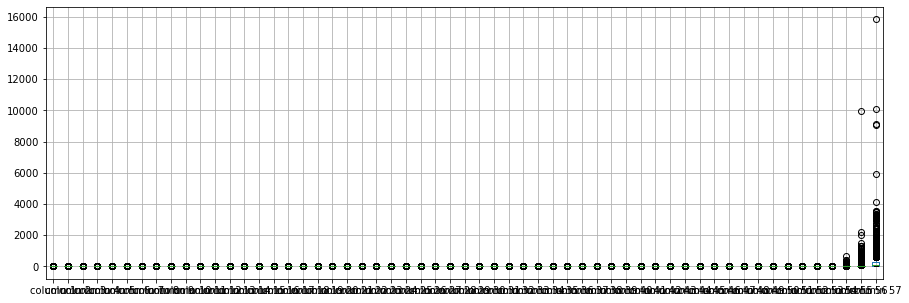

In [47]:
df.boxplot(return_type='axes', figsize=(15,5))

In [48]:
df.mean()

column 1       0.106775
column 2       0.215965
column 3       0.281366
column 4       0.071720
column 5       0.314098
column 6       0.094978
column 7       0.114582
column 8       0.109737
column 9       0.089642
column 10      0.242311
column 11      0.062313
column 12      0.541520
column 13      0.094027
column 14      0.053748
column 15      0.047907
column 16      0.256029
column 17      0.140260
column 18      0.187888
column 19      1.663856
column 20      0.092867
column 21      0.833923
column 22      0.122026
column 23      0.100543
column 24      0.094361
column 25      0.565433
column 26      0.260532
column 27      0.765805
column 28      0.124989
column 29      0.094773
column 30      0.107228
column 31      0.061971
column 32      0.045825
column 33      0.099069
column 34      0.045477
column 35      0.117026
column 36      0.092340
column 37      0.135127
column 38      0.013607
column 39      0.076573
column 40      0.060691
column 41      0.044645
column 42      0

In [49]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.014476,0.060673,0.005556,0.018656,0.051981,-0.005269,-0.001955,0.111259,0.036204,...,-0.016889,-0.023939,-0.028101,-0.035978,0.073963,0.102393,-0.010040,0.061451,0.050002,0.074009
column 2,-0.014476,1.000000,-0.036286,-0.007399,-0.026666,-0.025296,0.007855,-0.015109,-0.006280,0.037781,...,-0.015507,-0.005025,-0.042983,-0.017863,-0.010438,-0.010917,0.005727,-0.004207,0.001285,-0.022225
column 3,0.060673,-0.036286,1.000000,-0.021799,0.070320,0.081707,0.029925,0.012763,0.077237,0.024498,...,-0.024854,-0.036796,-0.018972,-0.032754,0.167882,0.096265,-0.001299,0.114509,0.097276,0.062508
column 4,0.005556,-0.007399,-0.021799,1.000000,0.005293,-0.007812,0.027357,0.005527,-0.000125,-0.005227,...,-0.002094,-0.000750,-0.014238,-0.007486,-0.005242,0.013057,-0.000240,0.009133,0.021718,0.028037
column 5,0.018656,-0.026666,0.070320,0.005293,1.000000,0.057777,0.135831,0.026374,0.016848,0.030968,...,-0.032345,-0.031756,-0.052268,-0.026540,0.041291,0.041193,-0.009635,0.057246,0.044361,-0.009912
column 6,0.051981,-0.025296,0.081707,-0.007812,0.057777,1.000000,0.048437,0.076141,0.110376,0.010288,...,-0.031319,-0.014406,0.004012,-0.011371,0.063925,0.123575,0.003927,-0.011367,0.068838,0.057285
column 7,-0.005269,0.007855,0.029925,0.027357,0.135831,0.048437,1.000000,0.023956,0.033259,0.047292,...,-0.030883,-0.034331,-0.052643,-0.027057,0.058881,0.070409,0.045673,0.065645,0.046585,-0.016174
column 8,-0.001955,-0.015109,0.012763,0.005527,0.026374,0.076141,0.023956,1.000000,0.118852,0.078743,...,-0.022686,-0.030305,-0.035260,-0.023521,0.039464,0.059672,-0.006493,0.018494,0.027103,0.037100
column 9,0.111259,-0.006280,0.077237,-0.000125,0.016848,0.110376,0.033259,0.118852,1.000000,0.118259,...,-0.021674,-0.018139,-0.026089,0.009860,0.081056,0.132602,0.000485,0.141934,0.138888,0.238894
column 10,0.036204,0.037781,0.024498,-0.005227,0.030968,0.010288,0.047292,0.078743,0.118259,1.000000,...,-0.012534,0.017014,0.015732,0.009058,0.032842,0.050596,0.050658,0.086216,0.070171,0.068171


In [50]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+36,17+36+36,17+36+36+36,17+36+36,17+36,17], vae_layer = False, seed = 360)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 429.0086285793823
Epoch: 1 , loss: 428.59437339064965
Epoch: 2 , loss: 425.77797082243063
Epoch: 3 , loss: 428.5996481865541


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)